In [2]:
!pip install matplotlib

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [36]:
# Create random data
N = 200
X = np.random.random(N) * 9 - 5 # Generates an array of 200 random numbers uniformly distributed between 0 and 1.
y = 0.5 * X - 1 + np.random.randn(N) * 0.5 #np.random.randn(N) * 0.5 => Noise to have real life data

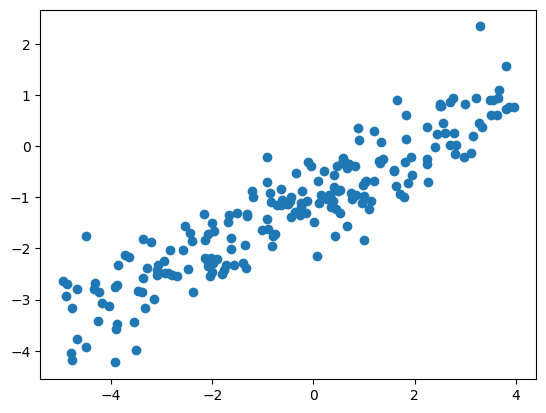

In [37]:
plt.scatter(X,y)

In [12]:
# Build the model
i = Input(shape = (1,)) # 1D entry

x = Dense(1)(i)
# Cette ligne ajoute une couche dense (complètement connectée) au modèle.
#Dense(1) signifie que la couche a une seule unité neuronale (ou sortie).

model = Model(i,x)
#   [ Entrée (X) ]  --->  [ Neurone de la couche Dense ]  --->  [ Sortie (y) ]
#      (scalaire)          (avec un poids et un biais)         (scalaire)

#Cette ligne crée le modèle en spécifiant les entrées (i) et les sorties (x).
#Le modèle relie donc l'entrée scalaire à la sortie scalaire via une couche dense.

#Keras initialise la couche Dense(1) avec :
#Un poids 𝑎 (valeur aléatoire au début, qui sera ajusté pendant l'entraînement).
#Un biais 𝑏 (valeur initialisée à zéro ou proche de zéro).
#La sortie de ce modèle est donc calculée comme 𝑦=𝑎𝑋+𝑏.


##### Differentes dimensions
#shape=(1,) : Chaque exemple est une seule valeur.
#Exemples : la température, une note, la vitesse, etc.

#shape=(n,) avec n > 1 : Chaque exemple contient plusieurs valeurs.
#Exemples : les coordonnées (𝑥,𝑦,𝑧)
#(x,y,z), les pixels d'une image en 1D, un vecteur de caractéristiques, etc.

#Parfois, les données sont des matrices (par exemple, une image 2D ou des séries temporelles).
# Dans ce cas, shape=(n, m) représente une matrice 𝑛×𝑚n×m pour chaque exemple.





In [ ]:
#Shape	Signification	Exemple

##shape=(1,)	Une seule valeur par exemple	[2.5]
#Tâche : Régression simple (prédire un scalaire, comme le prix d'une maison en fonction de sa superficie)
#Forme de la sortie (y) : Un scalaire (shape=(1,)).
#Exemple : 𝑦=[100000,120000,95000]
#y=[100000,120000,95000] (prix des maisons).

##shape=(3,)	Trois valeurs par exemple	[2.5, 1.0, -0.3]
#Tâche : Prédire plusieurs valeurs pour chaque entrée (par exemple, prédire les coordonnées
#(𝑥,𝑦,𝑧) d'un objet à partir de ses capteurs).
#Forme de la sortie (y) : Un vecteur de 𝑛 dimensions, correspondant à ce que vous prédisez.
#Exemple y=[3.4,−2.1,0.8] (prédiction des coordonnées d'un objet).


#shape=(3, 2)	Chaque exemple est une matrice 3×2	[[2.5, 1.0], [1.3, -0.8], [-0.7, 0.9]]
#Exemple : Prédiction d'une matrice (régression multi-dimensionnelle)
#Tâche : Si chaque entrée est une matrice, la sortie peut aussi être une matrice (par exemple, prédiction d'une carte thermique ou d'une image).
#Forme de la sortie (y) : Une matrice de dimensions spécifiques.
#Exemple : 𝑦=[1.5 0.8
#             0.3 0.9]


#shape=(n, m, k)	Chaque exemple est un tenseur 3D (par exemple une vidéo 3D)	Dépend des dimensions spécifiées


In [13]:
model.summary() # 2 params (1 entry and 1 output)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(
    loss = 'mse',
    optimizer = Adam(learning_rate= 0.1), #optimiseur avancé basé descente de gradient avec ajustement adaptatif des taux d'apprentissage pour chaque paramètre.
    metrics = ['mae']
)

### LOSS
#La perte est une fonction utilisée pour entraîner le modèle.
#Elle mesure l'erreur globale entre les prédictions (𝑦^​ ) et les vraies valeurs (𝑦) pour optimiser les poids du modèle.
#Objectif : Minimiser cette valeur pendant l'entraînement afin que les prédictions soient aussi précises que possible.
#Role: Dirige l'optimiseur (comme Adam ou SGD) en lui indiquant dans quelle direction ajuster les poids.
#La perte est interne au processus d'entraînement. C'est la "boussole" qui guide le modèle pour qu'il apprenne.

### Metrics
#La métrique est une fonction utilisée pour évaluer les performances du modèle.
#Objectif : Fournir des informations compréhensibles sur la qualité des prédictions.
#Rôle principal :
#Aider à surveiller les performances pendant et après l'entraînement.
#Peut différer de la fonction de perte si une autre mesure est plus significative pour l'utilisateur ou l'application.
#La métrique est une mesure externe utilisée pour comprendre à quel point le modèle fonctionne bien dans des termes pratiques.


In [25]:
# reshape for Keras, l'idée est de passer d'un tableau 1D à ce que veut keras: un  2D
#Si vous utilisez un tableau unidimensionnel (𝑁,) vous obtiendrez une erreur, car Keras s'attend à (𝑁,1)
# pour un modèle avec une seule caractéristique.
#Ex:  X = np.array([1, 2, 3, 4, 5])  # Un tableau 1D
#X_reshaped = X.reshape(-1, 1)   # Transformation en tableau 2D
#print(X_reshaped)
# Résultat :
# [[1]
#  [2]
#  [3]
#  [4]
#  [5]]
#print(X_reshaped.shape)  # Résultat : (5, 1)

r = model.fit(
    X.reshape(-1, 1),  # Données d'entrée : X reshaped en 2D (N, 1)
    y,  # Valeurs de sortie (cibles)
    epochs=800,  # Nombre d'itérations sur l'ensemble des données
    batch_size=32  # Taille de chaque lot d'entraînement, batch_size ne peut pas être plus grand que X.
) #A chaque epoch, le model voit batch_size exemples avant de mettre à jour ses poids

### EPOCHS
# indique combien de fois le modèle va voir l'intégralité des données
# d'entraînement. Par exemple, si vous avez un epoch=10, le modèle va passer
# 10 fois par l'ensemble complet des données. %%

### Batch_size

# Petit batch_size :
# Si batch_size est petit (par exemple, 1), chaque mise à
# jour des poids se fait après chaque exemple d'entraînement. C'est ce qu'on
# appelle la descente de gradient stochastique (SGD).

# Grand batch_size :
# Si batch_size est grand (par exemple, 32 ou 64), le modèle met à jour les poids
# après avoir vu plusieurs exemples. Cela revient à effectuer une descente de
# gradient par mini-lots (mini-batch gradient descent). %% %%

Epoch 1/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.9368 - mae: 1.8348  
Epoch 2/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3619 - mae: 0.4854 
Epoch 3/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8692 - mae: 0.7517 
Epoch 4/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4078 - mae: 0.4943 
Epoch 5/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3380 - mae: 0.4504 
Epoch 6/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3912 - mae: 0.5129 
Epoch 7/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2825 - mae: 0.4173 
Epoch 8/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2957 - mae: 0.4195 
Epoch 9/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2615 - mae: 0.3921 
Epoch 10/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2679 - mae: 0.3967 
Epoch 11/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2660 - mae: 0.3904 
Epoch 12/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2800 - mae: 0.4072 
Epoch 13/800
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/ste

In [17]:
#Scénario :
# Batch_size=1 et Epochs = 10
#Nous avons un ensemble de données 𝑋=[1,2,3,4,5] et des cibles 𝑦=[3,5,7,9,11]
#Le batch_size est de 1 et epochs est de 10.

#Itération par lot : Puisque le batch_size est de 1, à chaque itération de l'algorithme, le modèle verra un seul exemple à la fois.
#Mise à jour des poids : Après chaque exemple, les poids du modèle seront mis à jour,
#ce qui permet d'ajuster progressivement le modèle à chaque étape.
#Déroulement d'une itération pour chaque epoch :

#Lors de la première époque :
#Le modèle voit l'exemple
#𝑋1=1 et ajuste ses poids en fonction de l'erreur entre la prédiction et la vraie valeur
#𝑦1=3Le modèle voit l'exemple 𝑋2=2, ajuste les poids, puis voit 𝑋3=3, et ainsi de suite, jusqu'à ce qu'il ait vu tous les exemples.
#Une fois tous les exemples vus, l'epoch 1 est terminée.
#Lors de la deuxième époque :
#Le modèle recommence depuis le début des données et répète le processus.
#Résumé :

#Chaque epoch comprend 5 mises à jour des poids (une pour chaque exemple).
#Après 10 époques, il y a eu 50 mises à jour des poids (10 * 5 = 50)




#Scénario :
# Batch_size=5 et Epochs = 2
#Toujours avec 𝑋=[1,2,3,4,5] et 𝑦=[3,5,7,9,11] mais cette fois-ci, le batch_size est de 5 et epochs est de 2.

#Itération par lot : Puisque le batch_size est de 5, à chaque itération, le modèle voit tout l'ensemble des données.
#Mise à jour des poids : Une seule mise à jour des poids sera effectuée après avoir vu les 5 exemples,
# ce qui est plus rapide mais moins détaillé que dans le cas précédent.
#Déroulement d'une itération pour chaque epoch :

#Lors de la première époque :
#Le modèle voit tous les exemples d'un coup (c'est-à-dire
#𝑋1=[1,2,3,4,5] et ajuste les poids une seule fois en fonction de la moyenne des erreurs sur ces 5 exemples.
#Cela représente une mise à jour des poids après avoir vu l'intégralité des 5 exemples.
#Lors de la deuxième époque :
#Le modèle recommence depuis le début des données et ajuste à nouveau les poids après avoir vu les 5 exemples.
#Résumé :
#Chaque epoch comprend 1 mise à jour des poids (après avoir vu l'ensemble des données).
#Après 2 époques, il y a eu 2 mises à jour des poids (2 * 1 = 2).



#Différences entre petit et grand batch_size :
#Vitesse de calcul :

#Petit batch_size (1) : L'algorithme met à jour les poids après chaque exemple, ce qui peut être plus lent car il y a plus de mises à jour.
#Grand batch_size (5) : L'algorithme met à jour les poids après avoir vu plusieurs exemples en même temps, ce qui est généralement
# plus rapide par rapport à un batch_size de 1, mais chaque mise à jour peut être moins précise.
#Stabilité de l'entraînement :

#Petit batch_size (1) : L'entraînement peut être plus bruyant, avec des mises à jour des poids plus erratiques,
# mais cela peut aussi aider à échapper aux minima locaux.
#Grand batch_size (5) : L'entraînement est plus stable, mais la mise à jour des poids peut être moins précise,
#et l'algorithme pourrait se retrouver coincé dans des minima locaux.
#Précision des mises à jour :

#Petit batch_size : Chaque mise à jour est effectuée en fonction de l'erreur sur un seul exemple,
#donc les mises à jour sont plus précises pour chaque exemple individuel, mais moins lissées.
#Grand batch_size : Les mises à jour sont plus globales (en moyenne sur tous les exemples du batch),
#ce qui donne un apprentissage plus "lissé", mais chaque mise à jour est moins précise pour chaque exemple.



In [21]:
#Prediction
Xtest = np.linspace(-4,4,20).reshape(-1,1)
#reshape(-1,1) :
#-1 : Cela indique à numpy de calculer automatiquement la taille de cette dimension,
# en fonction des autres dimensions et du nombre total d'éléments. Cela permet d'éviter de calculer manuellement cette dimension.
#1 : Cela spécifie que vous voulez que chaque ligne contienne une seule valeur,
# ce qui signifie que vous souhaitez que vos données d'entrée soient sous forme de colonne. Chaque élément du tableau devient une "ligne"
# dans une colonne.
Xtest

array([[-4.        ],
       [-3.57894737],
       [-3.15789474],
       [-2.73684211],
       [-2.31578947],
       [-1.89473684],
       [-1.47368421],
       [-1.05263158],
       [-0.63157895],
       [-0.21052632],
       [ 0.21052632],
       [ 0.63157895],
       [ 1.05263158],
       [ 1.47368421],
       [ 1.89473684],
       [ 2.31578947],
       [ 2.73684211],
       [ 3.15789474],
       [ 3.57894737],
       [ 4.        ]])

In [26]:
ptest = model.predict(Xtest) # le modele est construit poour etre une droite (reglin)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


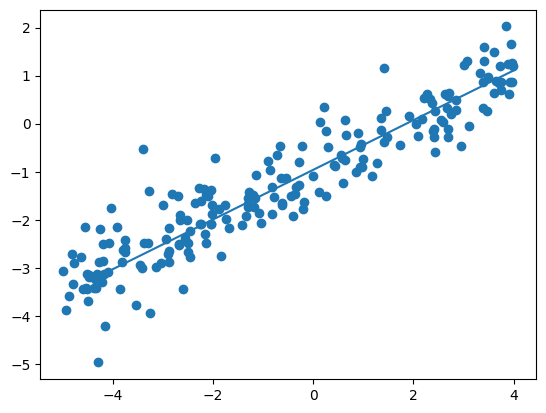

In [27]:
plt.scatter(X,y) # nuage de points
plt.plot(Xtest,ptest) #plt.plot() trace des lignes reliant des points => on a bien une droite

In [28]:
model.layers[1].get_weights() #[array([[a]], dtype=float32), array([b], dtype=float32)]

#y=aX+b
#Où :

#a est le poids (coefficient de régression)
#b est le biais (terme constant).

[array([[0.51701933]], dtype=float32), array([-0.9609352], dtype=float32)]